# SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION 


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #2: IMPORT DATASET

In [3]:
Fuel_economy_data = pd.read_csv("FuelEconomy.csv")

In [5]:
Fuel_economy_data

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [6]:
Fuel_economy_data.head(10)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
5,175.838106,24.173571
6,271.441608,17.163583
7,294.425916,17.274218
8,126.211008,28.718210
9,163.350335,28.289516


In [7]:
Fuel_economy_data.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [8]:
Fuel_economy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# STEP#3: VISUALIZE DATASET

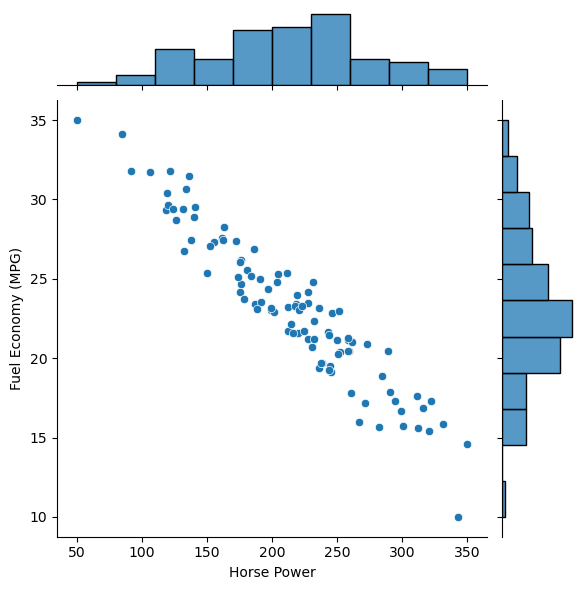

In [13]:
sns.jointplot(x ="Horse Power",y ="Fuel Economy (MPG)",data =Fuel_economy_data)

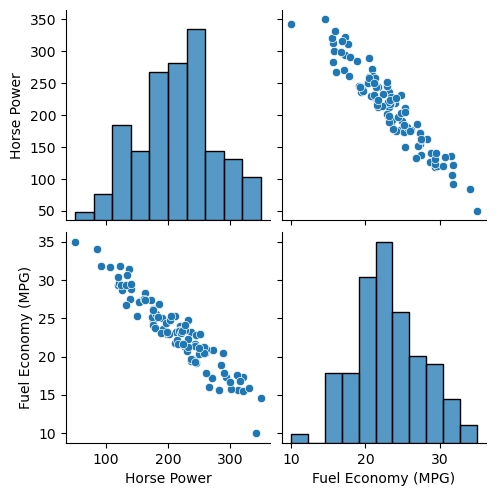

In [14]:
sns.pairplot(data = Fuel_economy_data)

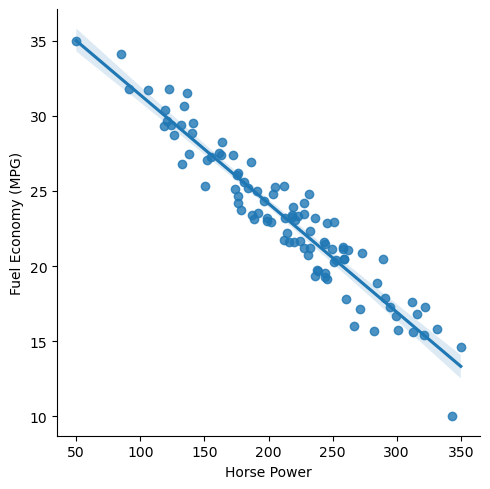

In [16]:
sns.lmplot(x ="Horse Power",y = "Fuel Economy (MPG)",data = Fuel_economy_data)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [21]:
X = Fuel_economy_data[["Horse Power"]]

In [19]:
y = Fuel_economy_data["Fuel Economy (MPG)"]

In [22]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [23]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25)

# STEP#5: TRAIN THE MODEL

In [26]:
X_train.shape

(75, 1)

In [28]:
X_test.shape

(25, 1)

In [29]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor = LinearRegression(fit_intercept = True)

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
print("Linear model Coefficient (m):",regressor.coef_)
print("Linear model Coefficient (b):",regressor.intercept_)

Linear model Coefficient (m): [-0.07190885]
Linear model Coefficient (b): 38.627601897855754


# STEP#6: TEST THE MODEL 

In [40]:
y_predict = regressor.predict(X_train)
y_predict

array([28.68514378, 22.05529545, 29.0045393 , 26.21299449, 21.5368033 ,
       17.81070824, 20.02766714, 20.54795445, 20.0446128 , 21.92917238,
       23.98899803, 25.97313835, 20.59938489, 13.45950387, 22.57900964,
       17.45577243, 32.54612706, 21.45314423, 16.97914144, 22.90873399,
       22.4954207 , 20.95093879, 21.05607411, 20.46684989, 29.96371887,
       14.77553691, 29.08748552, 28.52927555, 19.10854763, 23.40240482,
       19.00326332, 24.12887472, 28.49134438, 23.37695414, 21.61599995,
       25.07240755, 25.60721473, 22.25608021, 19.88280199, 21.9551822 ,
       15.54835838, 28.82596139, 25.98328563, 22.86068987, 25.94816094,
       22.80056536, 15.48440305, 22.94377219, 25.15835428, 30.98674297,
       26.01846295, 26.92008284, 25.38752463, 27.45186131, 21.09397952,
       24.84160985, 15.91752831, 16.20948299, 20.05294543, 22.75581216,
       19.79811741, 17.08871069, 24.32073797, 26.11982542, 23.32978788,
       18.3058551 , 24.88589493, 29.71912361, 26.88126694, 13.96

In [41]:
y_train

34    27.473415
60    20.715722
49    30.674803
41    27.387012
90    19.723462
        ...    
0     29.344195
51    17.873266
15    20.467374
24    21.623369
91    25.286954
Name: Fuel Economy (MPG), Length: 75, dtype: float64

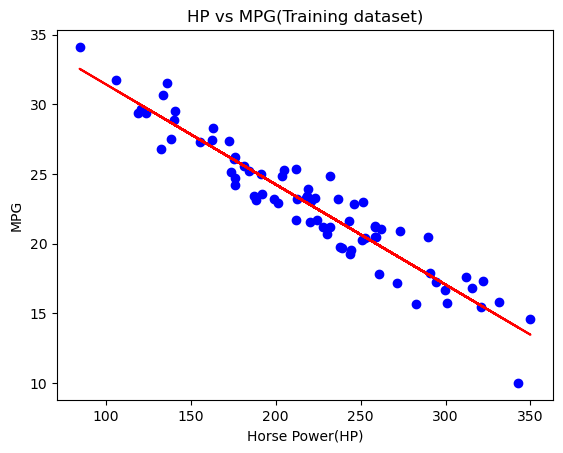

In [46]:
plt.scatter(X_train,y_train,c = 'b')
plt.plot(X_train,regressor.predict(X_train),c ='r')
plt.xlabel("Horse Power(HP)")
plt.ylabel("MPG")
plt.title("HP vs MPG(Training dataset)")
plt.show()

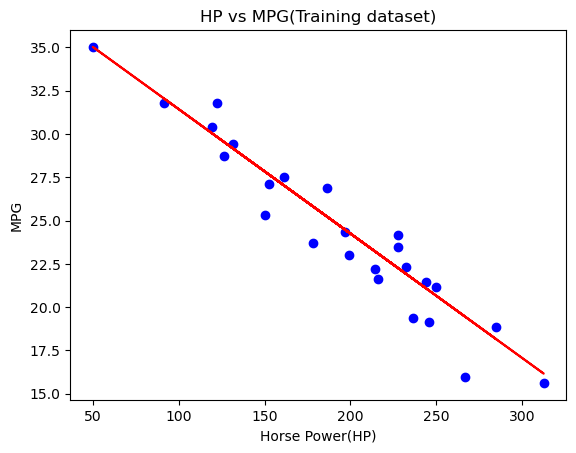

In [47]:
plt.scatter(X_test,y_test,c = 'b')
plt.plot(X_test,regressor.predict(X_test),c ='r')
plt.xlabel("Horse Power(HP)")
plt.ylabel("MPG")
plt.title("HP vs MPG(Training dataset)")
plt.show()

In [49]:
Horse_power =[[200]]
y_predict = regressor.predict(Horse_power)
y_predict

array([24.24583159])

In [50]:
Horse_power =[[75]]
y_predict = regressor.predict(Horse_power)
y_predict

array([33.23443803])

# By Buliding the Model I able to predict the Mileage Per Gallon

In [51]:
# THANK YOU